In [1]:
import pandas as  pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math
import seaborn as sns

In [2]:
crash=pd.read_csv('CDS_all.csv', encoding = "utf-8")

C:\Users\Meredith.Raymer\Anaconda3\envs\geo_env2\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
numNoneTypebyRow=crash.isnull().sum(axis=1).tolist()
numNoneTypebyColumn=crash.isnull().sum(axis=0).tolist()
x=len(numNoneTypebyRow)
y=len(numNoneTypebyColumn)
fullRow=0
fullCol=0
for element in numNoneTypebyRow:
    if element==0:
        fullRow=fullRow+1
for element in numNoneTypebyColumn:
    if element==0:
        fullCol=fullCol+1
print('Total Number of Rows', x)
print('Number of Full Rows',fullRow)
print('Total Number of Columns', y)
print('Number of Full Columns',fullCol)

Total Number of Rows 83926
Number of Full Rows 0
Total Number of Columns 58
Number of Full Columns 3


No row has complete data. Columns that were considered important and essential were Park Name, Date, Time and Type. Any observations without these 4 components were removed. Originally, there were 83926 crashes, this cleaning process yielded 83147 observations.

In [4]:
percentIncomplete=[]
for element in numNoneTypebyRow:
    percentIncomplete.append(element/58)

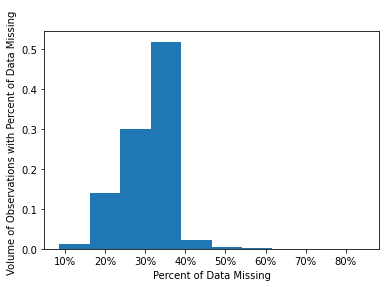

In [5]:
plt.hist(percentIncomplete, weights=np.ones(len(percentIncomplete)) / len(percentIncomplete))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Percent of Data Missing')
plt.ylabel('Volume of Observations with Percent of Data Missing ')
plt.show()

In [6]:
crash

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,"Tuesday, June 10, 2014",1635.0,NaN,...,38.91205,-76.93412,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,"Tuesday, October 9, 2012",1100.0,101,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,"Tuesday, November 17, 2009",1709.0,NaN,...,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,"Saturday, August 4, 2007",1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,"Wednesday, April 25, 2007",750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83921,83123,N/A050208172701,9999003672,ZZZZ,NaN,1,NaN,"Tuesday, February 8, 2005",1727.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83922,83117,N/A050118055001,9999001622,ZZZZ,NaN,1,VA,"Tuesday, January 18, 2005",550.0,5036,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83923,83113,N/A050108164801,9999000671,ZZZZ,NaN,1,NaN,"Saturday, January 8, 2005",1648.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
83924,83110,N/A050104183001,9999000291,ZZZZ,NaN,1,NaN,"Tuesday, January 4, 2005",1830.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
allCrash = crash.loc[crash.PARK_ALPHA != 'ZZZZ']
allCrash = allCrash[allCrash['CRASH_DATE'].notna()]
allCrash = allCrash[allCrash['CRASH_DATE'].notna()]
allCrash.columns

Index(['OBJECTID', 'INCID_NO', 'CASE_NUM', 'PARK_ALPHA', 'Region', '# Crash',
       'STATE_CODE', 'CRASH_DATE', 'CRASH_TIME', 'RTE_NO', 'RTE_NAME',
       'NODE_DIST_FT', 'NODE_DIST_MI', 'NODE_DIR', 'NODE_NUM', 'LIGHT',
       'WEATHER', 'CRASH_LOCATION', 'SURF_COND', 'CRASH_CLASS', 'VEH_COLL',
       'OBJ_STRUCK', 'ROAD_CHAR', 'CON_FACT1', 'CON_FACT2', 'CON_FACT3',
       'CON_FACT4', 'CON_FACT5', 'CON_FACT6', 'HIT_RUN', 'CATEGORY', 'FATALS',
       'INJURED', 'PED_FAT', 'PED_INJ', 'BIKE_FAT', 'BIKE_INJ', 'PED',
       'CRASH_YEAR', 'COMMENTS', 'ZIPFILE', 'LOCATION', 'PHOTOS_TAKEN',
       'USPP_NPS_VEH_INV', 'PARK_PTY_DEST', 'LOCKED_UPDATE', 'LOCKED_BY_USER',
       'DATA_SRC', 'LATITUDE', 'LONGITUDE', 'MILEPOST', 'IMPORT_DATE',
       'FILE_NAME', 'SAVE_DATE', 'ROUTE_IDENT', 'RIP_CYCLE', 'MP_NODE',
       'SPTL_LOC'],
      dtype='object')

In [8]:
allCrash['CRASH_DATE']=pd.to_datetime(allCrash['CRASH_DATE'])
allCrash['day_of_week'] = allCrash['CRASH_DATE'].dt.day_name()

In [9]:
df_day_grouped=allCrash.groupby(['day_of_week']).count()
df_day_grouped=df_day_grouped.reset_index()
df_day_grouped=df_day_grouped[['day_of_week','# Crash']].sort_values(by='day_of_week')
df_day_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_day_grouped=df_day_grouped.reindex([1,5,6,4,0,2,3])
df_day_grouped

,day_of_week,number_of_crashes
1,Monday,10928
5,Tuesday,11419
6,Wednesday,11789
4,Thursday,12088
0,Friday,13293
2,Saturday,12642
3,Sunday,10988


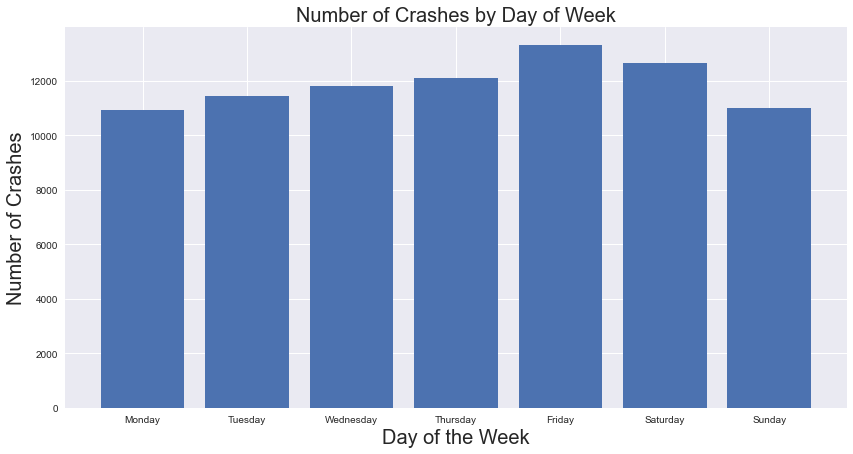

In [10]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_grouped.day_of_week, df_day_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [11]:
df_type_grouped=allCrash.groupby(['CATEGORY']).count()
df_type_grouped=df_type_grouped.reset_index()
df_type_grouped=df_type_grouped[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_grouped

,CATEGORY,number_of_crashes
0,FATAL,322
1,INJURY,12161
2,PD ONLY,70091


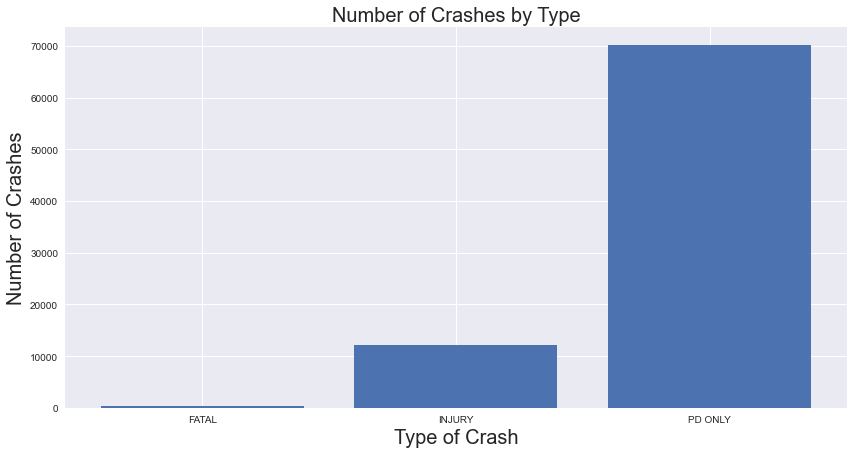

In [12]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_type_grouped.CATEGORY, df_type_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Type', fontsize=20)

ax.set_xlabel('Type of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [13]:
allCrash['hour'] = (allCrash['CRASH_TIME']/100).astype(int) *100
allCrash.head()

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour
0,6,ABLI140610163500,14054379,ABLI,SER,1,KY,2014-06-10,1635.0,NaN,...,0.0,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,1600
1,5,ABLI121009110000,12474,ABLI,SER,1,KY,2012-10-09,1100.0,101,...,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,1100
2,4,ABLI091117170900,N08113,ABLI,SER,1,NY,2009-11-17,1709.0,NaN,...,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Tuesday,1700
3,3,ABLI070804175500,5540070013,ABLI,SER,1,KY,2007-08-04,1755.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Saturday,1700
4,2,ABLI070425075000,5540070001,ABLI,SER,1,KY,2007-04-25,750.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Wednesday,700


In [14]:
df_time_grouped=allCrash.groupby(['hour']).count()
df_time_grouped=df_time_grouped.reset_index()
df_time_grouped=df_time_grouped[['hour','# Crash']].sort_values(by='hour')
df_time_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_time_grouped

,hour,number_of_crashes
0,0,1541
1,100,1244
2,200,1255
3,300,1191
4,400,883
5,500,1308
6,600,2429
7,700,3700
8,800,4410
9,900,4122


[Text(0.5, 1.0, 'Number of Crashes by Hour')]

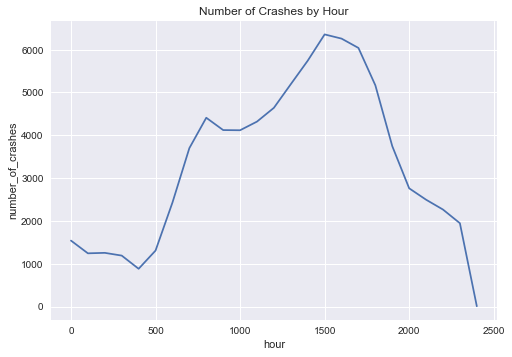

In [15]:
sns.lineplot(data=df_time_grouped, x="hour", y="number_of_crashes").set(title='Number of Crashes by Hour')

In [16]:
df_region_grouped=allCrash.groupby(['Region']).count()
df_region_grouped=df_region_grouped.reset_index()
df_region_grouped=df_region_grouped[['Region','# Crash']].sort_values(by='Region')
df_region_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_region_grouped

,Region,number_of_crashes
0,AKR,9
1,IMR,9654
2,MWR,630
3,NCR,49374
4,NER,8399
5,PWR,7269
6,SER,7812


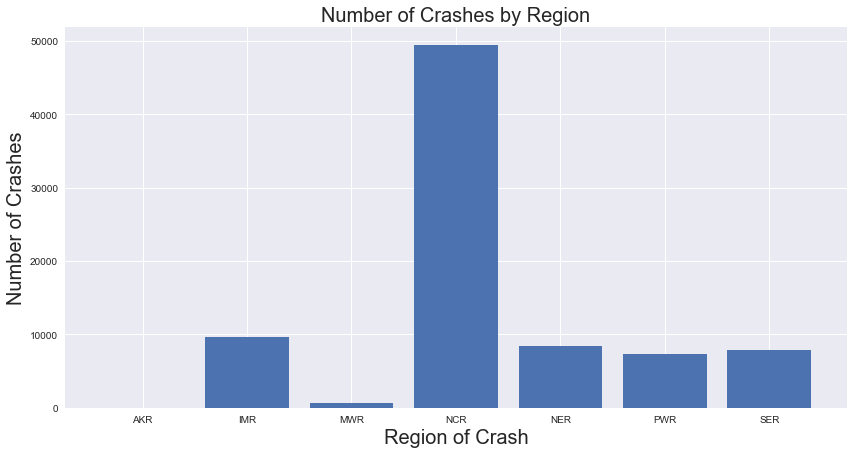

In [17]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_region_grouped.Region, df_region_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Region', fontsize=20)

ax.set_xlabel('Region of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [18]:
allCrash['year'] = allCrash['CRASH_DATE'].dt.year
mask = (allCrash['year'] > 2007) & (allCrash['year'] <= 2011)
allCrash = allCrash.loc[mask]

In [19]:
IMRcrashes = allCrash.loc[allCrash.Region == 'IMR']
IMRcrashes

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour,year
15747,15839,BIBE111102090000,111370,BIBE,IMR,1,TX,2011-11-02,900.0,4021,...,NaN,NaN,00:00.0,BIBE-0428,C3,0.271,1,Wednesday,900,2011
15748,15838,BIBE110528213000,110915,BIBE,IMR,1,TX,2011-05-28,2130.0,NaN,...,NaN,NaN,00:00.0,BIBE-0428,C3,0.446,1,Saturday,2100,2011
15749,15837,BIBE110421190900,110724,BIBE,IMR,1,TX,2011-04-21,1909.0,16,...,NaN,NaN,00:00.0,BIBE-0015,C3,23.008,1,Thursday,1900,2011
15750,15835,BIBE101122170000,100865,BIBE,IMR,1,TX,2010-11-22,1700.0,109,...,NaN,NaN,00:00.0,BIBE-0109,C3,3.590,1,Monday,1700,2010
15751,15834,BIBE101120153000,20100857,BIBE,IMR,1,TX,2010-11-20,1530.0,106,...,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Saturday,1500,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83097,82702,ZION080915190000,1590081951,ZION,IMR,1,UT,2008-09-15,1900.0,10,...,NaN,NaN,NaN,ZION-0010,C3,1.561,1,Monday,1900,2008
83098,82701,ZION080912113000,1590081915,ZION,IMR,1,UT,2008-09-12,1130.0,10,...,NaN,NaN,NaN,ZION-0010,C3,4.079,1,Friday,1100,2008
83099,82695,ZION080804140300,1590081536,ZION,IMR,1,UT,2008-08-04,1403.0,10,...,NaN,NaN,NaN,ZION-0010,C3,7.464,1,Monday,1400,2008
83100,82694,ZION080803141000,1590081525,ZION,IMR,1,UT,2008-08-03,1410.0,0,...,NaN,NaN,NaN,ZION-0014,C3,2.287,1,Sunday,1400,2008


In [20]:
df_year_groupedIMR=IMRcrashes.groupby(['year']).count()
df_year_groupedIMR=df_year_groupedIMR.reset_index()
df_year_groupedIMR=df_year_groupedIMR[['year','# Crash']].sort_values(by='year')
df_year_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_year_groupedIMR

,year,number_of_crashes
0,2008,968
1,2009,1060
2,2010,1109
3,2011,968


In [21]:
df_day_groupedIMR=IMRcrashes.groupby(['day_of_week']).count()
df_day_groupedIMR=df_day_groupedIMR.reset_index()
df_day_groupedIMR=df_day_groupedIMR[['day_of_week','# Crash']].sort_values(by='day_of_week')
df_day_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_day_groupedIMR=df_day_groupedIMR.reindex([1,5,6,4,0,2,3])
df_day_groupedIMR

,day_of_week,number_of_crashes
1,Monday,541
5,Tuesday,611
6,Wednesday,550
4,Thursday,594
0,Friday,579
2,Saturday,617
3,Sunday,613


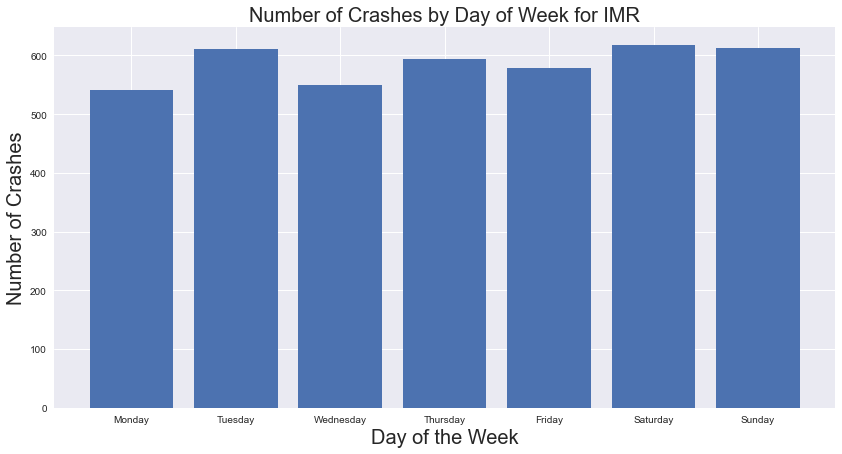

In [22]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_groupedIMR.day_of_week, df_day_groupedIMR.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week for IMR', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [23]:
df_type_groupedIMR=IMRcrashes.groupby(['CATEGORY']).count()
df_type_groupedIMR=df_type_groupedIMR.reset_index()
df_type_groupedIMR=df_type_groupedIMR[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_groupedIMR

,CATEGORY,number_of_crashes
0,FATAL,7
1,INJURY,367
2,PD ONLY,3724


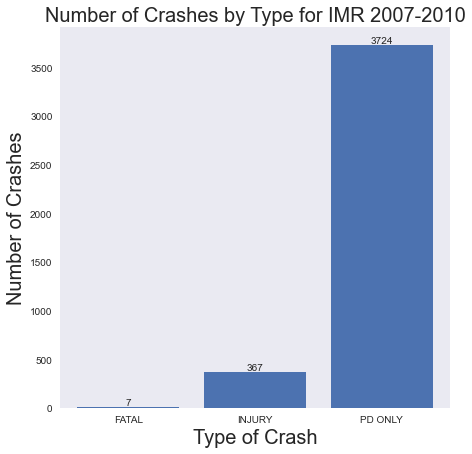

In [24]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(7, 7))
ax.bar(df_type_groupedIMR.CATEGORY, df_type_groupedIMR.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Type for IMR 2007-2010', fontsize=20)

ax.set_xlabel('Type of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
plt.grid(False)
for i in range(len(df_type_groupedIMR.CATEGORY)):
    plt.annotate(str(df_type_groupedIMR.number_of_crashes[i]), xy=(df_type_groupedIMR.CATEGORY[i],df_type_groupedIMR.number_of_crashes[i]), ha='center', va='bottom')

plt.show()

[Text(0.5, 1.0, 'Number of Crashes by Hour in IMR')]

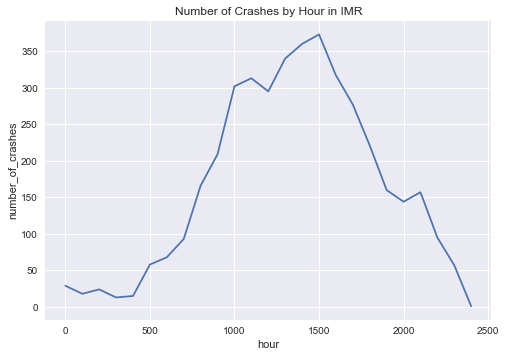

In [25]:
df_time_groupedIMR=IMRcrashes.groupby(['hour']).count()
df_time_groupedIMR=df_time_groupedIMR.reset_index()
df_time_groupedIMR=df_time_groupedIMR[['hour','# Crash']].sort_values(by='hour')
df_time_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
sns.lineplot(data=df_time_groupedIMR, x="hour", y="number_of_crashes").set(title='Number of Crashes by Hour in IMR')

In [26]:
df_park_groupedIMR=IMRcrashes.groupby(['PARK_ALPHA']).count()
df_park_groupedIMR=df_park_groupedIMR.reset_index()
df_park_groupedIMR=df_park_groupedIMR[['PARK_ALPHA','# Crash']].sort_values(by='PARK_ALPHA')
df_park_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_park_groupedIMR.rename(columns={'PARK_ALPHA': 'Park'}, inplace=True)
df_park_groupedIMR=df_park_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_park_groupedIMR

,Park,number_of_crashes
18,YELL,1536
8,GRCA,741
9,GRTE,499
16,ROMO,384
6,GLAC,315
19,ZION,166
12,MEVE,107
7,GLCA,105
0,BIBE,62
13,PAIS,49


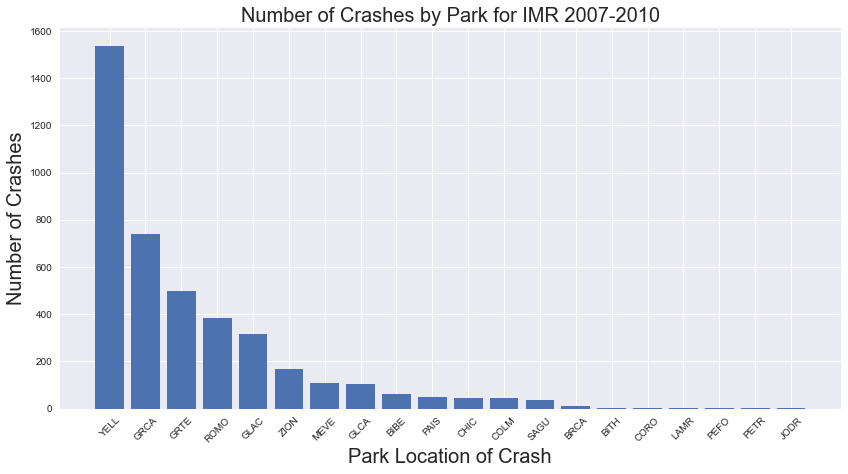

In [27]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_park_groupedIMR.Park,df_park_groupedIMR.number_of_crashes)
ax.set_title('Number of Crashes by Park for IMR 2007-2010', fontsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('Park Location of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [28]:
df_light_groupedIMR=IMRcrashes.groupby(['LIGHT']).count()
df_light_groupedIMR=df_light_groupedIMR.reset_index()
df_light_groupedIMR=df_light_groupedIMR[['LIGHT','# Crash']].sort_values(by='LIGHT')
df_light_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_light_groupedIMR.rename(columns={'LIGHT': 'LightingConditionCode'}, inplace=True)
df_light_groupedIMR['LightingCondition']=['Daylight','Dawn','Dusk','Dark-Lighted','Dark-Not Lighted','Blank','Unknown']
df_light_groupedIMR=df_light_groupedIMR.sort_values(by=['number_of_crashes'])
df_light_groupedIMR=df_light_groupedIMR.drop(['LightingConditionCode'], axis=1)
df_light_groupedIMR

,number_of_crashes,LightingCondition
6,59,Unknown
3,66,Dark-Lighted
1,79,Dawn
2,154,Dusk
5,308,Blank
4,459,Dark-Not Lighted
0,2973,Daylight


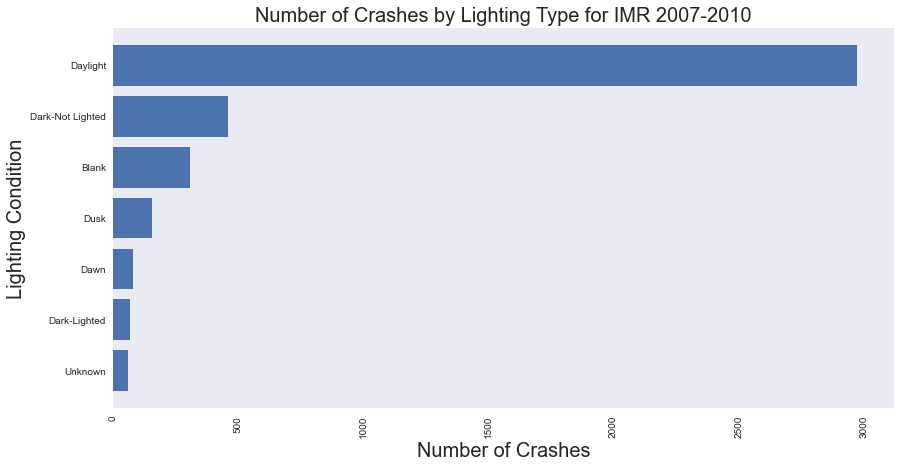

In [29]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.barh(df_light_groupedIMR.LightingCondition,df_light_groupedIMR.number_of_crashes)
ax.set_title('Number of Crashes by Lighting Type for IMR 2007-2010', fontsize=20)
plt.xticks(rotation=90)
ax.set_xlabel('Number of Crashes', fontsize=20)
ax.set_ylabel('Lighting Condition', fontsize=20)
ax.grid(False)


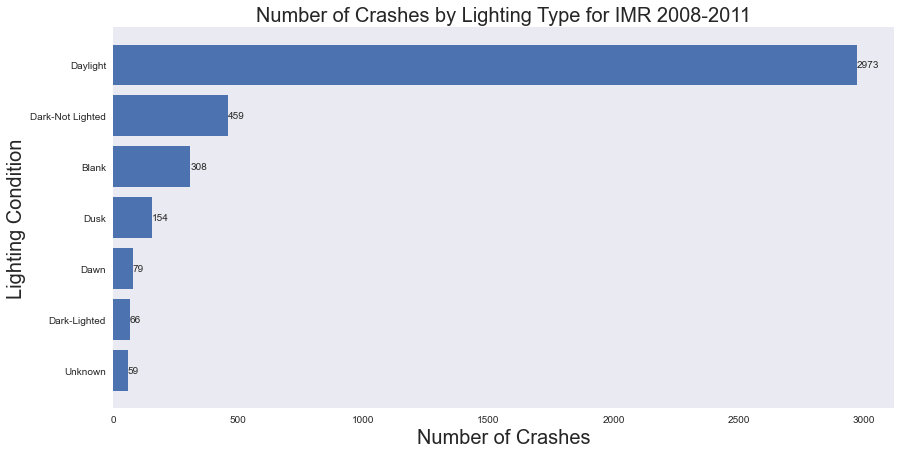

In [30]:

fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.barh(df_light_groupedIMR.LightingCondition,df_light_groupedIMR.number_of_crashes)
ax.set_title('Number of Crashes by Lighting Type for IMR 2008-2011', fontsize=20)
#df_light_groupedIMR.plot(kind = "barh", color = "steelblue", legend = False, grid = True, ax = ax) 

for i, v in enumerate(sorted(df_light_groupedIMR.number_of_crashes)):
    plt.text(v+0.2, i, str(round(v, 2)), va="center")
    
ax.set_xlabel('Number of Crashes', fontsize=20)
ax.set_ylabel('Lighting Condition', fontsize=20)
ax.grid(False)

In [31]:
df_weather_groupedIMR=IMRcrashes.groupby(['WEATHER']).count()
df_weather_groupedIMR=df_weather_groupedIMR.reset_index()
df_weather_groupedIMR=df_weather_groupedIMR[['WEATHER','# Crash']].sort_values(by='WEATHER')
df_weather_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_weather_groupedIMR.rename(columns={'WEATHER': 'WeatherConditionCode'}, inplace=True)
df_weather_groupedIMR['WeatherCondition']=['Clear','Cloudy','Rain','Snow','Fog,Smog,Smoke','Sleet,Hail,Freezing Rain','Blowing Sand, Soil, Dirt','Severe Crosswinds','Other','Blank','Unknown']
df_weather_groupedIMR=df_weather_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_weather_groupedIMR=df_weather_groupedIMR.drop([8,9])
df_weather_groupedIMR=df_weather_groupedIMR.reset_index()
df_weather_groupedIMR

,index,WeatherConditionCode,number_of_crashes,WeatherCondition
0,0,1.0,2758,Clear
1,1,2.0,534,Cloudy
2,3,4.0,229,Snow
3,2,3.0,129,Rain
4,10,99.0,70,Unknown
5,4,5.0,26,"Fog,Smog,Smoke"
6,7,8.0,11,Severe Crosswinds
7,5,6.0,10,"Sleet,Hail,Freezing Rain"
8,6,7.0,6,"Blowing Sand, Soil, Dirt"


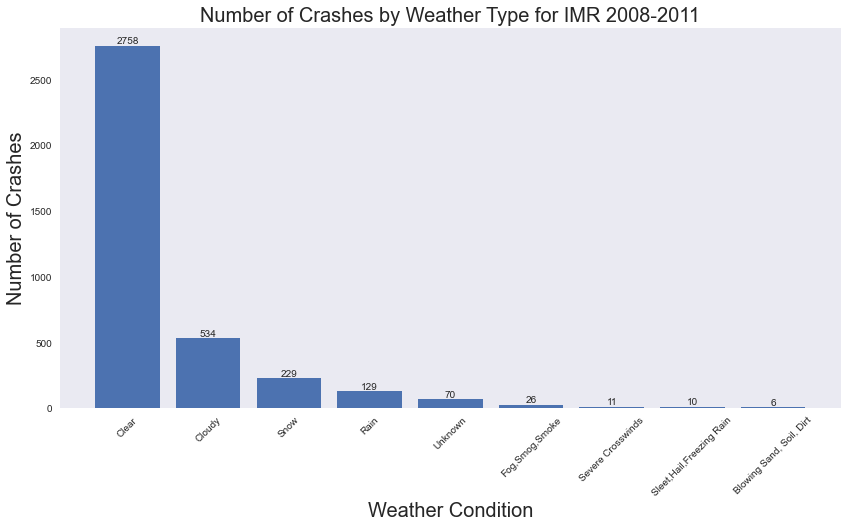

In [32]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_weather_groupedIMR.WeatherCondition,df_weather_groupedIMR.number_of_crashes)
ax.set_title('Number of Crashes by Weather Type for IMR 2008-2011', fontsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('Weather Condition', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid(False)


for i in range(len(df_weather_groupedIMR.WeatherCondition)):
    plt.annotate(str(df_weather_groupedIMR.number_of_crashes[i]), xy=(df_weather_groupedIMR.WeatherCondition[i],df_weather_groupedIMR.number_of_crashes[i]), ha='center', va='bottom')

plt.show()

In [33]:
df_location_groupedIMR=IMRcrashes.groupby(['CRASH_LOCATION']).count()
df_location_groupedIMR=df_location_groupedIMR.reset_index()
df_location_groupedIMR=df_location_groupedIMR[['CRASH_LOCATION','# Crash']].sort_values(by='CRASH_LOCATION')
df_location_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_location_groupedIMR.rename(columns={'CRASH_LOCATION': 'LocationTypeCode'}, inplace=True)
df_location_groupedIMR['LocationType']=['Intersection On Roadway','Parking/Driveway Access On Roadway','Interchange On Roadway','Bridge On Roadway','Work Zone On Roadway','On Roadway-Other','On Roadway-In Lane','Parking Lot Off Roadway','Turnout/Overlook Off Roadway','Roadside','Median','Off Roadway Other','Shoulder(other than shoulder within median)','Outside shoulder-left','Outside shoulder-right','Gore','Blank','Unknown']
df_location_groupedIMR=df_location_groupedIMR.sort_values(by=['number_of_crashes'])
df_location_groupedIMR

,LocationTypeCode,number_of_crashes,LocationType
12,26.0,6,Shoulder(other than shoulder within median)
10,24.0,12,Median
15,30.0,13,Gore
2,13.0,18,Interchange On Roadway
13,28.0,19,Outside shoulder-left
3,14.0,32,Bridge On Roadway
17,99.0,40,Unknown
14,29.0,55,Outside shoulder-right
4,15.0,80,Work Zone On Roadway
8,22.0,98,Turnout/Overlook Off Roadway


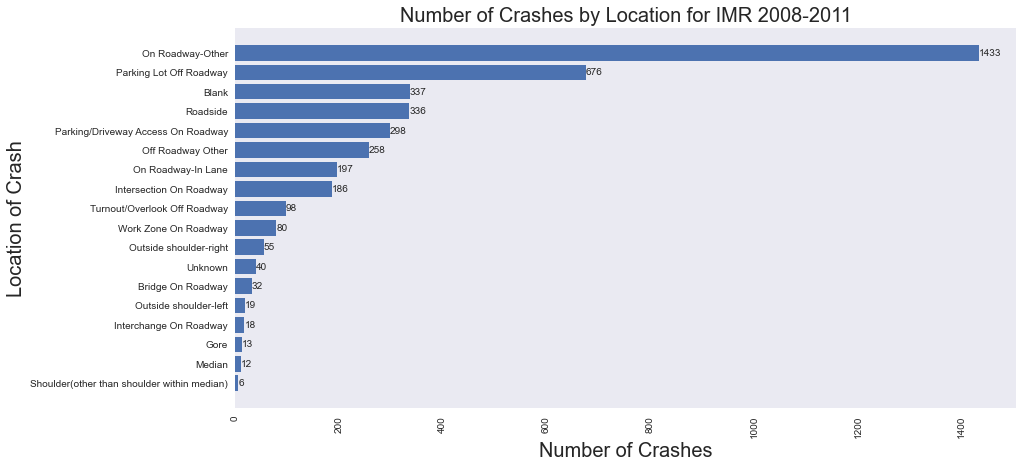

In [34]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.barh(df_location_groupedIMR.LocationType,df_location_groupedIMR.number_of_crashes)
ax.set_title('Number of Crashes by Location for IMR 2008-2011', fontsize=20)
plt.xticks(rotation=90)
ax.set_xlabel('Number of Crashes', fontsize=20)
ax.set_ylabel('Location of Crash', fontsize=20)
ax.grid(False)

for i, v in enumerate(sorted(df_location_groupedIMR.number_of_crashes)):
    plt.text(v+0.2, i, str(round(v, 2)), va="center")
    
plt.show()

In [35]:
df_surface_groupedIMR=IMRcrashes.groupby(['SURF_COND']).count()
df_surface_groupedIMR=df_surface_groupedIMR.reset_index()
df_surface_groupedIMR=df_surface_groupedIMR[['SURF_COND','# Crash']].sort_values(by='SURF_COND')
df_surface_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_surface_groupedIMR.rename(columns={'SURF_COND': 'SurfaceConditionCodes'}, inplace=True)
df_surface_groupedIMR['SurfaceCondition']=['Dry', 'Wet','Icy or Slushy','Snowy','Muddy','Debris','Other','Blank','Unknown']
df_surface_groupedIMR=df_surface_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_surface_groupedIMR

,SurfaceConditionCodes,number_of_crashes,SurfaceCondition
0,1.0,2829,Dry
7,98.0,320,Blank
2,3.0,286,Icy or Slushy
3,4.0,242,Snowy
1,2.0,238,Wet
6,88.0,68,Other
8,99.0,67,Unknown
5,6.0,35,Debris
4,5.0,14,Muddy


In [36]:
df_class_groupedIMR=IMRcrashes.groupby(['CRASH_CLASS']).count()
df_class_groupedIMR=df_class_groupedIMR.reset_index()
df_class_groupedIMR=df_class_groupedIMR[['CRASH_CLASS','# Crash']].sort_values(by='CRASH_CLASS')
df_class_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_class_groupedIMR.rename(columns={'CRASH_CLASS': 'CrashClassCode'}, inplace=True)
df_class_groupedIMR['CrashClass']=['Non-collision','Collision with Other Motor Vehicle','Collision with Fixed Object','Collision with Pedestrian','Collision with Pedalcycle','Collision with Parked Motor Vehicle','Collision with Railway Train','Collision with Animal','Non-collision(Overturn)','Collision with Other Object','Blank','Unknown']
df_class_groupedIMR=df_class_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_class_groupedIMR

,CrashClassCode,number_of_crashes,CrashClass
1,1.0,1235,Collision with Other Motor Vehicle
2,2.0,835,Collision with Fixed Object
7,7.0,548,Collision with Animal
0,0.0,434,Non-collision
10,98.0,434,Blank
5,5.0,290,Collision with Parked Motor Vehicle
9,88.0,211,Collision with Other Object
11,99.0,65,Unknown
3,3.0,29,Collision with Pedestrian
4,4.0,7,Collision with Pedalcycle


In [37]:
df_coll_groupedIMR=IMRcrashes.groupby(['VEH_COLL']).count()
df_coll_groupedIMR=df_coll_groupedIMR.reset_index()
df_coll_groupedIMR=df_coll_groupedIMR[['VEH_COLL','# Crash']].sort_values(by='VEH_COLL')
df_coll_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_coll_groupedIMR.rename(columns={'VEH_COLL': 'VehicleCollisionTypeCode'}, inplace=True)
df_coll_groupedIMR['VehicleCollisionType']=['Not Applicable','Head On','Rear End','Angle','Sideswipe-Opposing','Sideswipe-Overtaking','Rear-to-rear','Other','Blank','Unknown']
df_coll_groupedIMR=df_coll_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_coll_groupedIMR

,VehicleCollisionTypeCode,number_of_crashes,VehicleCollisionType
0,0.0,1810,Not Applicable
8,98.0,552,Blank
2,2.0,493,Rear End
7,88.0,278,Other
3,3.0,277,Angle
4,4.0,236,Sideswipe-Opposing
5,5.0,181,Sideswipe-Overtaking
1,1.0,131,Head On
9,99.0,110,Unknown
6,6.0,20,Rear-to-rear


In [38]:
df_obj_groupedIMR=IMRcrashes.groupby(['OBJ_STRUCK']).count()
df_obj_groupedIMR=df_obj_groupedIMR.reset_index()
df_obj_groupedIMR=df_obj_groupedIMR[['OBJ_STRUCK','# Crash']].sort_values(by='OBJ_STRUCK')
df_obj_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_obj_groupedIMR.rename(columns={'OBJ_STRUCK': 'ObjectStruckCode'}, inplace=True)
df_obj_groupedIMR['ObjectStruck']=['Not Applicable','Guardrail/Barrier','Rock/Stone Wall','Pole','Tree/Shrub','Culvert End Wall','Drainage Structure','Bridge Structure','Sign','Barricade','Boulder','Ditch','Backslope','Other','Blank','Unknown']
df_obj_groupedIMR=df_obj_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_obj_groupedIMR

,ObjectStruckCode,number_of_crashes,ObjectStruck
0,0.0,2445,Not Applicable
14,98.0,606,Blank
4,4.0,312,Tree/Shrub
13,88.0,223,Other
2,2.0,104,Rock/Stone Wall
1,1.0,77,Guardrail/Barrier
11,11.0,77,Ditch
10,10.0,65,Boulder
3,3.0,53,Pole
8,8.0,46,Sign


In [39]:
df_obj_groupedIMR=df_obj_groupedIMR.drop([15, 14])
df_obj_groupedIMR

,ObjectStruckCode,number_of_crashes,ObjectStruck
0,0.0,2445,Not Applicable
4,4.0,312,Tree/Shrub
13,88.0,223,Other
2,2.0,104,Rock/Stone Wall
1,1.0,77,Guardrail/Barrier
11,11.0,77,Ditch
10,10.0,65,Boulder
3,3.0,53,Pole
8,8.0,46,Sign
9,9.0,35,Barricade


In [40]:
df_road_groupedIMR=IMRcrashes.groupby(['ROAD_CHAR']).count()
df_road_groupedIMR=df_road_groupedIMR.reset_index()
df_road_groupedIMR=df_road_groupedIMR[['ROAD_CHAR','# Crash']].sort_values(by='ROAD_CHAR')
df_road_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_road_groupedIMR.rename(columns={'ROAD_CHAR': 'RoadCharacteristicCode'}, inplace=True)
df_road_groupedIMR['RoadCharacteristics']=['Straight and Level','Straight on Grade','Curved and Level','Curved on Grade','Blank','Unknown']
df_road_groupedIMR=df_road_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_road_groupedIMR

,RoadCharacteristicCode,number_of_crashes,RoadCharacteristics
0,1.0,1888,Straight and Level
3,4.0,663,Curved on Grade
1,2.0,489,Straight on Grade
4,98.0,469,Blank
2,3.0,437,Curved and Level
5,99.0,139,Unknown


In [41]:
df_cont_groupedIMR=IMRcrashes.groupby(['CON_FACT1']).count()
df_cont_groupedIMR=df_cont_groupedIMR.reset_index()
df_cont_groupedIMR=df_cont_groupedIMR[['CON_FACT1','# Crash']].sort_values(by='CON_FACT1')
df_cont_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_cont_groupedIMR.rename(columns={'CON_FACT1': 'MainContributingFactor'}, inplace=True)
df_cont_groupedIMR=df_cont_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
# A16= Driver: Failed to Give Full Time and Attention
# B06= Environment: Animal
# A11= Driver: Improper Backing
# A06= Driver: Too Fast for Conditions
# A88= Driver: Other

In [42]:
df_route_groupedIMR=IMRcrashes.groupby(['RTE_NAME','PARK_ALPHA','ROUTE_IDENT']).count()
df_route_groupedIMR=df_route_groupedIMR.reset_index()
df_route_groupedIMR=df_route_groupedIMR[['RTE_NAME','ROUTE_IDENT',"PARK_ALPHA",'# Crash']].sort_values(by='RTE_NAME')
df_route_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_route_groupedIMR.rename(columns={'RTE_NAME': 'RouteName'}, inplace=True)
df_park_groupedIMR.rename(columns={'PARK_ALPHA': 'Park'}, inplace=True)
df_route_groupedIMR=df_route_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
df_route_groupedIMR.head(25)

,RouteName,ROUTE_IDENT,PARK_ALPHA,number_of_crashes
202,GRAND LOOP ROAD,YELL-0010,YELL,561
198,GOING TO THE SUN ROAD,GLAC-0010W,GLAC,159
604,SOUTH ENTRANCE ROAD,GRCA-0012,GRCA,108
733,WEST ENTRANCE ROAD,YELL-0015,YELL,81
655,TRAIL RIDGE ROAD,ROMO-0010,ROMO,78
140,EAST ENTRANCE ROAD,YELL-0013,YELL,72
609,SOUTH ENTRANCE ROAD,YELL-0014,YELL,67
469,NORTHEAST ENTRANCE ROAD,YELL-0012,YELL,60
362,MAIN PARK ROAD,MEVE-0010,MEVE,56
364,MAIN PARK ROAD,ZION-0010,ZION,49


In [43]:
YELLcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'YELL']
ROMOcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'ROMO']
GRTEcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'GRTE']
GRCAcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'GRCA']
MEVEcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'MEVE']
ZIONcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'ZION']
SAGUcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'SAGU']
GLACcrashes = allCrash.loc[allCrash.PARK_ALPHA == 'GLAC']

In [44]:
grouping=IMRcrashes.groupby(['PARK_ALPHA', 'RTE_NAME']).size()

In [45]:
fatalcrashes=IMRcrashes.loc[IMRcrashes.CATEGORY=='FATAL']
fatalcrashes

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,...,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour,year
24445,24546,GLAC110723173300,110387,GLAC,IMR,1,MT,2011-07-23,1733.0,10,...,NaN,NaN,00:00.0,GLAC-0010W,C3,20.559,1,Saturday,1700,2011
26426,26384,GRCA100923182500,105600,GRCA,IMR,1,AZ,2010-09-23,1825.0,16,...,NaN,NaN,NaN,GRCA-0016,C3,0.188,1,Thursday,1800,2010
44742,44530,LAMR110515165000,11216,LAMR,IMR,1,TX,2011-05-15,1650.0,105,...,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Sunday,1600,2011
68916,69191,ROMO090428220000,1520090212,ROMO,IMR,1,CO,2009-04-28,2200.0,10,...,NaN,NaN,NaN,ROMO-0010,C3,41.648,1,Tuesday,2200,2009
78994,78888,YELL100626150000,102106,YELL,IMR,1,WY,2010-06-26,1500.0,12,...,NaN,NaN,00:00.0,YELL-0012,C3,5.858,1,Saturday,1500,2010
79002,78881,YELL100624144700,102121,YELL,IMR,1,WY,2010-06-24,1447.0,17,...,NaN,NaN,00:00.0,YELL-0017,C3,2.389,1,Thursday,1400,2010
79569,78259,YELL080803134500,83676,YELL,IMR,1,WY,2008-08-03,1345.0,10,...,NaN,NaN,00:00.0,YELL-0010,C3,84.938,1,Sunday,1300,2008


In [46]:
pd.set_option('display.max_columns', None)
fatalcrashes

,OBJECTID,INCID_NO,CASE_NUM,PARK_ALPHA,Region,# Crash,STATE_CODE,CRASH_DATE,CRASH_TIME,RTE_NO,RTE_NAME,NODE_DIST_FT,NODE_DIST_MI,NODE_DIR,NODE_NUM,LIGHT,WEATHER,CRASH_LOCATION,SURF_COND,CRASH_CLASS,VEH_COLL,OBJ_STRUCK,ROAD_CHAR,CON_FACT1,CON_FACT2,CON_FACT3,CON_FACT4,CON_FACT5,CON_FACT6,HIT_RUN,CATEGORY,FATALS,INJURED,PED_FAT,PED_INJ,BIKE_FAT,BIKE_INJ,PED,CRASH_YEAR,COMMENTS,ZIPFILE,LOCATION,PHOTOS_TAKEN,USPP_NPS_VEH_INV,PARK_PTY_DEST,LOCKED_UPDATE,LOCKED_BY_USER,DATA_SRC,LATITUDE,LONGITUDE,MILEPOST,IMPORT_DATE,FILE_NAME,SAVE_DATE,ROUTE_IDENT,RIP_CYCLE,MP_NODE,SPTL_LOC,day_of_week,hour,year
24445,24546,GLAC110723173300,110387,GLAC,IMR,1,MT,2011-07-23,1733.0,10,GOING TO THE SUN ROAD,0.0,0.400,E,1190,1.0,1.0,12.0,1.0,1.0,2.0,0.0,1.0,A06,A09,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,NaN,NaN,logan creek comfort station,1.0,0.0,0.0,0.0,NaN,MANL,48.72035,-113.77106,20.159,NaN,NaN,00:00.0,GLAC-0010W,C3,20.559,1,Saturday,1700,2011
26426,26384,GRCA100923182500,105600,GRCA,IMR,1,AZ,2010-09-23,1825.0,16,CENTER ROAD,300.0,0.057,W,161,1.0,1.0,16.0,1.0,2.0,1.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,2.0,0.0,0.0,0.0,0.0,NaN,2010.0,NaN,NaN,East of Shuttle Bus Rd. Int.,0.0,0.0,0.0,0.0,NaN,MANL,36.03965,-112.12393,0.131,NaN,NaN,NaN,GRCA-0016,C3,0.188,1,Thursday,1800,2010
44742,44530,LAMR110515165000,11216,LAMR,IMR,1,TX,2011-05-15,1650.0,105,None,NaN,0.160,E,105,1.0,1.0,25.0,1.0,0.0,0.0,0.0,2.0,A88,E04,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2011.0,NaN,NaN,Rosita Flats OHV Area,1.0,0.0,0.0,0.0,NaN,MANL,NaN,NaN,NaN,NaN,NaN,00:00.0,NaN,NaN,NaN,0,Sunday,1600,2011
68916,69191,ROMO090428220000,1520090212,ROMO,IMR,1,CO,2009-04-28,2200.0,10,TRAIL RIDGE ROAD,0.0,0.300,N,417,5.0,1.0,25.0,1.0,0.0,98.0,98.0,4.0,A16,NaN,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2009.0,Updated NODENUM from 417A to 0417,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CIRS,40.26284,-105.83152,41.948,NaN,NaN,NaN,ROMO-0010,C3,41.648,1,Tuesday,2200,2009
78994,78888,YELL100626150000,102106,YELL,IMR,1,WY,2010-06-26,1500.0,12,NORTHEAST ENTRANCE ROAD,0.0,1.900,W,2059,1.0,1.0,23.0,1.0,2.0,0.0,2.0,4.0,A88,B08,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2010.0,NaN,NaN,East End Lamar Canyon,1.0,0.0,0.0,0.0,NaN,MANL,44.91426,-110.28038,7.758,NaN,NaN,00:00.0,YELL-0012,C3,5.858,1,Saturday,1500,2010
79002,78881,YELL100624144700,102121,YELL,IMR,1,WY,2010-06-24,1447.0,17,GRAND LOOP ROAD,0.0,1.000,S,8039,1.0,1.0,25.0,1.0,2.0,0.0,4.0,1.0,A15,NaN,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2010.0,NaN,NaN,1 MILE NORTH OF OLD FAITHFUL OVERPASS,1.0,0.0,0.0,0.0,NaN,MANL,44.45456,-110.82714,1.389,NaN,NaN,00:00.0,YELL-0017,C3,2.389,1,Thursday,1400,2010
79569,78259,YELL080803134500,83676,YELL,IMR,1,WY,2008-08-03,1345.0,10,GRAND LOOP ROAD,0.0,0.800,N,852,1.0,1.0,23.0,1.0,2.0,0.0,4.0,3.0,A16,NaN,NaN,NaN,NaN,NaN,0.0,FATAL,1.0,1.0,0.0,0.0,0.0,0.0,NaN,2008.0,NaN,NaN,North of Gull Point Hill,1.0,0.0,1.0,0.0,NaN,MANL,44.52386,-110.43559,84.138,NaN,NaN,00:00.0,YELL-0010,C3,84.938,1,Sunday,1300,2008


In [47]:
fatal_park_groupedIMR=fatalcrashes.groupby(['PARK_ALPHA']).count()
fatal_park_groupedIMR=fatal_park_groupedIMR.reset_index()
fatal_park_groupedIMR=fatal_park_groupedIMR[['PARK_ALPHA','# Crash']].sort_values(by='PARK_ALPHA')
fatal_park_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
fatal_park_groupedIMR.rename(columns={'PARK_ALPHA': 'Park'}, inplace=True)
fatal_park_groupedIMR=fatal_park_groupedIMR.sort_values(by=['number_of_crashes'],ascending=False)
fatal_park_groupedIMR

,Park,number_of_crashes
4,YELL,3
0,GLAC,1
1,GRCA,1
2,LAMR,1
3,ROMO,1


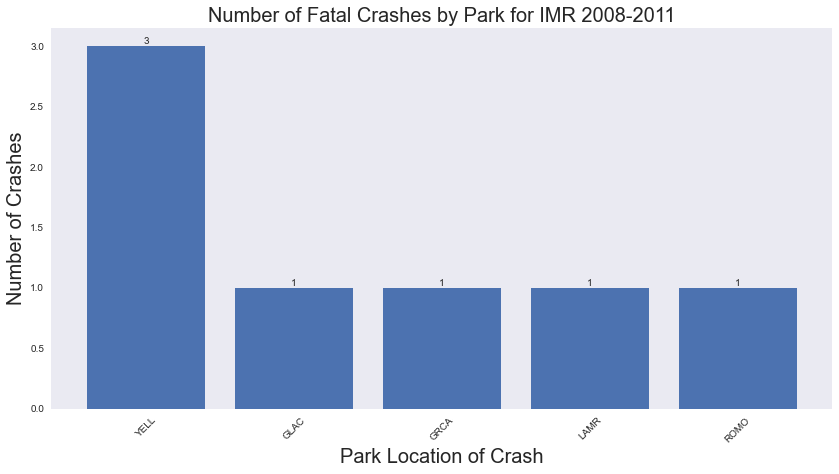

In [48]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(fatal_park_groupedIMR.Park,fatal_park_groupedIMR.number_of_crashes)
ax.set_title('Number of Fatal Crashes by Park for IMR 2008-2011', fontsize=20)
plt.xticks(rotation=45)
ax.set_xlabel('Park Location of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid(False)

for i in range(len(fatal_park_groupedIMR.Park)):
    plt.annotate(str(fatal_park_groupedIMR.number_of_crashes[i]), xy=(fatal_park_groupedIMR.Park[i],fatal_park_groupedIMR.number_of_crashes[i]), ha='center', va='bottom')

    
plt.show()

In [49]:
YELLcrashes.columns

Index(['OBJECTID', 'INCID_NO', 'CASE_NUM', 'PARK_ALPHA', 'Region', '# Crash',
       'STATE_CODE', 'CRASH_DATE', 'CRASH_TIME', 'RTE_NO', 'RTE_NAME',
       'NODE_DIST_FT', 'NODE_DIST_MI', 'NODE_DIR', 'NODE_NUM', 'LIGHT',
       'WEATHER', 'CRASH_LOCATION', 'SURF_COND', 'CRASH_CLASS', 'VEH_COLL',
       'OBJ_STRUCK', 'ROAD_CHAR', 'CON_FACT1', 'CON_FACT2', 'CON_FACT3',
       'CON_FACT4', 'CON_FACT5', 'CON_FACT6', 'HIT_RUN', 'CATEGORY', 'FATALS',
       'INJURED', 'PED_FAT', 'PED_INJ', 'BIKE_FAT', 'BIKE_INJ', 'PED',
       'CRASH_YEAR', 'COMMENTS', 'ZIPFILE', 'LOCATION', 'PHOTOS_TAKEN',
       'USPP_NPS_VEH_INV', 'PARK_PTY_DEST', 'LOCKED_UPDATE', 'LOCKED_BY_USER',
       'DATA_SRC', 'LATITUDE', 'LONGITUDE', 'MILEPOST', 'IMPORT_DATE',
       'FILE_NAME', 'SAVE_DATE', 'ROUTE_IDENT', 'RIP_CYCLE', 'MP_NODE',
       'SPTL_LOC', 'day_of_week', 'hour', 'year'],
      dtype='object')

In [50]:
df_type_groupedYELL=YELLcrashes.groupby(['CATEGORY']).count()
df_type_groupedYELL=df_type_groupedYELL.reset_index()
df_type_groupedYELL=df_type_groupedYELL[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
df_type_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_type_groupedYELL

,CATEGORY,number_of_crashes
0,FATAL,3
1,INJURY,144
2,PD ONLY,1389


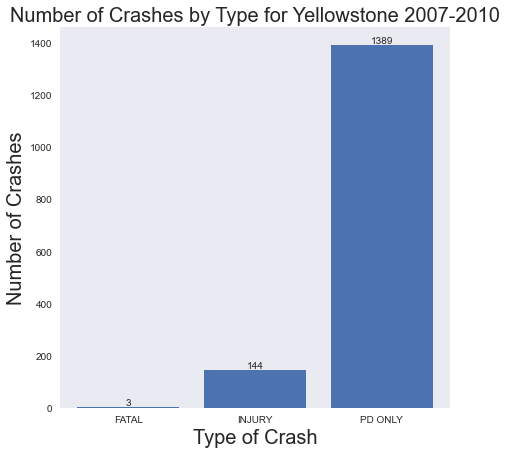

In [51]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(7, 7))
ax.bar(df_type_groupedYELL.CATEGORY, df_type_groupedYELL.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Type for Yellowstone 2007-2010', fontsize=20)

ax.set_xlabel('Type of Crash', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
plt.grid(False)
for i in range(len(df_type_groupedYELL.CATEGORY)):
    plt.annotate(str(df_type_groupedYELL.number_of_crashes[i]), xy=(df_type_groupedYELL.CATEGORY[i],df_type_groupedYELL.number_of_crashes[i]), ha='center', va='bottom')

plt.show()

In [52]:
df_class_groupedYELL=YELLcrashes.groupby(['CRASH_CLASS']).count()
df_class_groupedYELL=df_class_groupedYELL.reset_index()
df_class_groupedYELL=df_class_groupedYELL[['CRASH_CLASS','# Crash']].sort_values(by='CRASH_CLASS')
df_class_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_class_groupedYELL.rename(columns={'CRASH_CLASS': 'CrashClassCode'}, inplace=True)
df_class_groupedYELL['CrashClass']=['Non-collision','Collision with Other Motor Vehicle','Collision with Fixed Object','Collision with Pedestrian','Collision with Pedalcycle','Collision with Parked Motor Vehicle','Collision with Animal','Collision with Other Object','Blank','Unknown']
df_class_groupedYELL=df_class_groupedYELL.sort_values(by=['number_of_crashes'],ascending=False)
df_class_groupedYELL

,CrashClassCode,number_of_crashes,CrashClass
1,1.0,578,Collision with Other Motor Vehicle
2,2.0,281,Collision with Fixed Object
6,7.0,239,Collision with Animal
0,0.0,193,Non-collision
5,5.0,83,Collision with Parked Motor Vehicle
7,88.0,66,Collision with Other Object
8,98.0,56,Blank
9,99.0,18,Unknown
3,3.0,16,Collision with Pedestrian
4,4.0,3,Collision with Pedalcycle


In [53]:
df_year_groupedIMR=IMRcrashes.groupby(['year','PARK_ALPHA']).count()
df_year_groupedIMR=df_year_groupedIMR.reset_index()
df_year_groupedIMR=df_year_groupedIMR[['year',"PARK_ALPHA",'# Crash']].sort_values(by='year')
df_year_groupedIMR.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_year_groupedIMR.rename(columns={'PARK_ALPHA': 'Park'}, inplace=True)
df_year_groupedIMR=df_year_groupedIMR.sort_values(by=['Park'],ascending=False)
df_year_groupedIMR

,year,Park,number_of_crashes
57,2011,ZION,11
43,2010,ZION,43
13,2008,ZION,56
29,2009,ZION,56
56,2011,YELL,389
12,2008,YELL,326
42,2010,YELL,421
28,2009,YELL,400
55,2011,SAGU,9
27,2009,SAGU,10


In [54]:
df_location_groupedYELL=YELLcrashes.groupby(['CRASH_LOCATION']).count()
df_location_groupedYELL=df_location_groupedYELL.reset_index()
df_location_groupedYELL=df_location_groupedYELL[['CRASH_LOCATION','# Crash']].sort_values(by='CRASH_LOCATION')
df_location_groupedYELL.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_location_groupedYELL.rename(columns={'CRASH_LOCATION': 'LocationTypeCode'}, inplace=True)
#df_location_groupedYELL['LocationType']=['Intersection On Roadway','Parking/Driveway Access On Roadway','Interchange On Roadway','Bridge On Roadway','Work Zone On Roadway','On Roadway-Other','On Roadway-In Lane','Parking Lot Off Roadway','Turnout/Overlook Off Roadway','Roadside','Median','Off Roadway Other','Shoulder(other than shoulder within median)','Outside shoulder-left','Outside shoulder-right','Gore','Blank','Unknown']
df_location_groupedYELL=df_location_groupedYELL.sort_values(by=['number_of_crashes'])
df_location_groupedYELL

,LocationTypeCode,number_of_crashes
6,17.0,2
2,13.0,4
10,24.0,4
14,99.0,7
12,30.0,11
3,14.0,14
4,15.0,19
13,98.0,48
8,22.0,54
0,11.0,68
